In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr, kendalltau
from pathlib import Path


In [50]:
export_dir = "../new_data_comp_camp/Tables" #путь для сохранения таблиц

In [6]:
fig_width = 6.3  
fig_height = 3.54  
#plt.rcParams['figure.figsize'] = (fig_width, fig_height) # установка размеров для всех графиков
warnings.simplefilter(action='ignore', category=FutureWarning) #отключение предупреждений так как требуется легенда

Фильтрация данных для таблицы

In [9]:
file_path = "summary_per_color_group.xlsx"
data_t = pd.read_excel(file_path)
test_data = data_t.rename(columns=lambda x: x.replace('T258', 'CM')) #замена названий столбцов
test_data

,Unnamed: 0,id_person,id_test_attempt,CM_dH+_red_mean,CM_dH+_red_std,CM_dH+_red_min,CM_dH+_red_25%,CM_dH+_red_50%,CM_dH+_red_75%,CM_dH+_red_max,...,CM_t-_diff_std,CM_t-_diff_min,CM_t-_diff_25%,CM_t-_diff_50%,CM_t-_diff_75%,CM_t-_diff_max,CM_t-_corr,CM_t-_tau,age,sex
0,0,0,0,4.4,0.894427,3,4.0,5.0,5.0,5,...,0.199488,-0.439702,-0.167665,-0.013239,0.048695,0.179810,-0.675011,-0.589744,20.000000,1
1,1,1,0,5.8,4.086563,2,2.0,5.0,9.0,11,...,0.404501,-0.857777,-0.355069,-0.029450,0.183557,0.425022,-0.255191,-0.256410,20.008219,0
2,2,2,0,6.6,4.827007,1,3.0,6.0,11.0,12,...,0.464173,-1.027473,-0.354678,-0.064938,0.184453,0.431065,-0.350925,-0.282051,20.008219,0
3,3,3,0,3.0,1.414214,1,2.0,4.0,4.0,4,...,0.414251,-1.141142,-0.248764,0.022023,0.080722,0.436048,-0.554524,-0.435897,20.010959,1
4,4,4,0,2.8,1.095445,1,3.0,3.0,3.0,4,...,0.408456,-1.020269,-0.250063,-0.084858,0.152484,0.532100,-0.220087,-0.102564,20.013699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,4385,4260,0,7.0,3.391165,3,4.0,8.0,9.0,11,...,0.406149,-0.909109,-0.384053,-0.117617,0.165706,0.346490,-0.474693,-0.205128,83.375342,0
4386,4386,4261,0,6.4,3.435113,3,4.0,5.0,9.0,11,...,3.228683,-10.293112,-0.258581,-0.073563,0.057763,0.857544,-0.184272,-0.076923,83.471233,0
4387,4387,4262,0,19.2,13.442470,7,14.0,14.0,19.0,42,...,1.478447,-3.774944,-0.344245,-0.245770,0.033407,0.914895,-0.308304,-0.307692,83.567123,1
4388,4388,4263,0,8.2,2.167948,5,7.0,9.0,10.0,10,...,0.209551,-0.336175,-0.220182,-0.046289,0.127504,0.237383,-0.327578,-0.205128,84.076712,0


Фильтрация данных для графиков

In [31]:
data = test_data[["CM_dH+_green_50%", "CM_dH+_blue_50%","CM_dH+_50%","CM_dH+_red_50%", "id_test_attempt"]]

data = data[data["id_test_attempt"]<3]
data


,CM_dH+_green_50%,CM_dH+_blue_50%,CM_dH+_50%,CM_dH+_red_50%,id_test_attempt
0,4.0,5.5,5.0,5.0,0
1,1.0,1.5,2.0,5.0,0
2,1.5,1.5,2.0,6.0,0
3,1.5,2.0,2.0,4.0,0
4,2.0,2.0,3.0,3.0,0
...,...,...,...,...,...
4385,4.5,6.5,6.0,8.0,0
4386,8.0,10.0,9.0,5.0,0
4387,10.0,10.5,12.0,14.0,0
4388,7.5,9.5,9.0,9.0,0


## Построение графиков boxplot

Boxplot это графический способ представления распределения данных, который позволяет визуально оценить ключевые статистические характеристики набора данных. Он особенно полезен для выявления выбросов, асимметрии и сравнения распределений между различными группами данных. Коробка охватывает центральные 50% наблюдений, показывая разброс между первым и третьим квартилями (Q1 и Q3). Внутри коробки расположена медиана, которая делит данные на две равные части. Усы, идущие от коробки, показывают нормальный диапазон данных, а точки за пределами усов считаются выбросами

In [21]:
def build_boxplots(data):
    test_data = data.drop("id_test_attempt", axis=1)
    fig, axes = plt.subplots(nrows=1, ncols=len(test_data.columns), figsize=(5 * len(test_data.columns), 6))
    
    for i, col in enumerate(test_data.columns):
        
        sns.boxplot(x="id_test_attempt", y=col, ax=axes[i], data=data, palette="Set1", width=0.65)
        axes[i].set_xlabel('Номер попытки', fontsize=17, fontweight='light')
        col = col.replace('_', ' ') #изменение названий параметра для графика
        if (col == "CM dH+ yellow green 50%"):
                col = "CM dH+ yellow-green 50%"
        axes[i].set_ylabel(col, fontsize=17, fontweight='light')

        axes[i].tick_params(axis='x', labelsize=15)
        axes[i].tick_params(axis='y', labelsize=15)


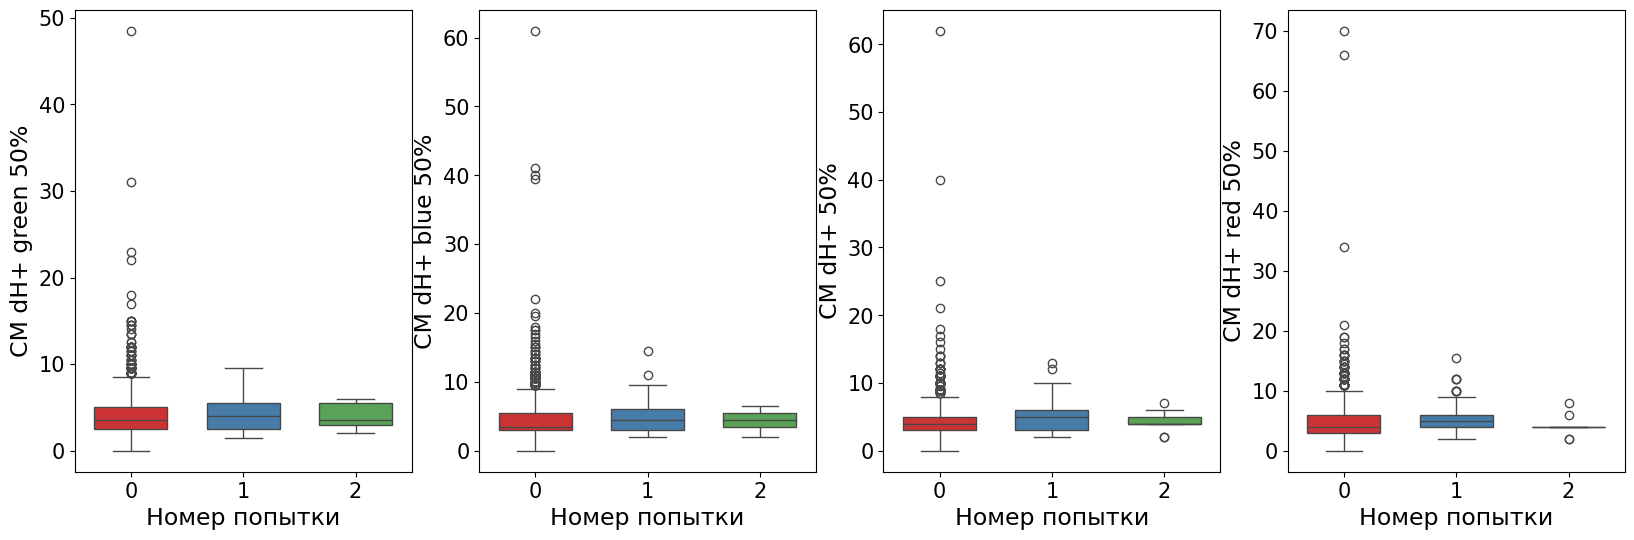

In [33]:
build_boxplots(data)

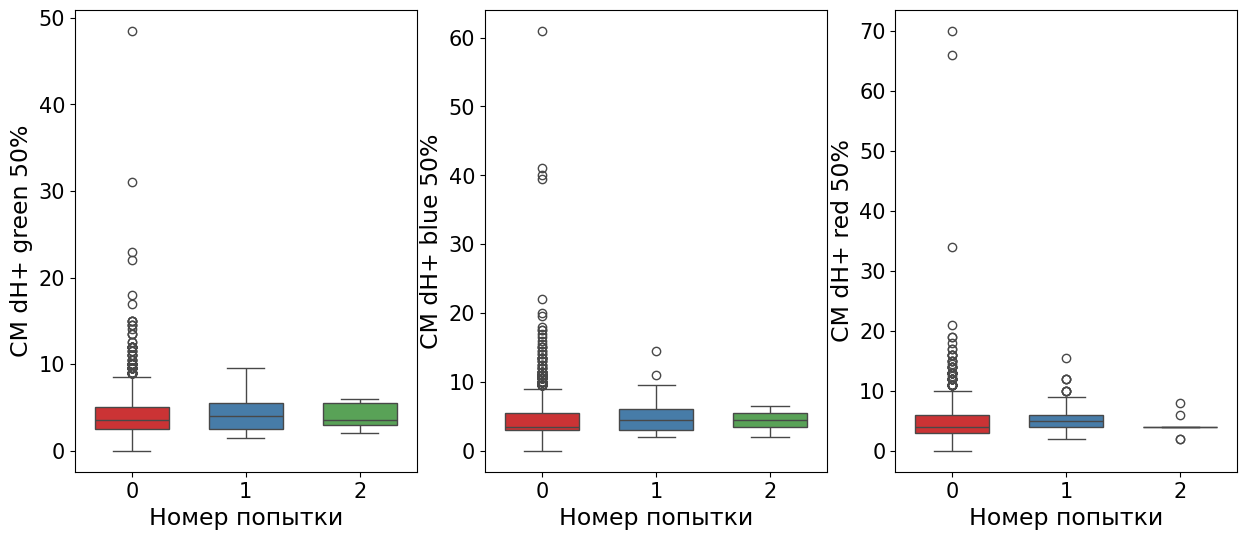

In [35]:
data = data.drop(columns = "CM_dH+_50%")
build_boxplots(data)

# Таблица с корреляциями


In [37]:
def calculate_correlations (data, data_col, particular_column, save_param = 0.5, save_tab = False, export_dir = None): 
                                                                                                                    #на 2 месте список нужных колонок
                                                                                                                    # на предпоследнем минимальный коэф
                                                                                                                    # для сохранения во 2 таблицу
    
    if export_dir is not None:
        export_dir = Path(export_dir)
        export_dir.mkdir(parents=True, exist_ok=True) #Создаёт папку по данному пути, первое создаёт все родительские папки,
                                                      #второе не вызовет ошибку если они уже есть
    # Задаем столбцы для итоговой таблицы
    columns = ['Показатель', 'Корреляция Спирмана', 'Pearson p-value','Статичтическая значимость', 
               'Корреляция Пирсона', 'Spearman p-value', 
               'Корреляция Кендалла', 'Kendall p-value']

    # Преобразование столбца particular_column в числовой формат
    data[particular_column] = pd.to_numeric(data[particular_column])
    
    # Создание пустой таблицы
    result_table = pd.DataFrame(columns=columns)
    high_corr_table = pd.DataFrame(columns=columns)
    
    for i,col in enumerate(data_col):
       
        # Вычисление корреляций и ошибки
        Pearson, Pear_p = pearsonr(data[particular_column], data[col])
        Spearman, Spear_p = spearmanr(data[particular_column], data[col])
        Kendall, Ken_p = kendalltau(data[particular_column], data[col])
        
        if Spear_p<0.05:
            importance = "Присутствует"
        else:
            importance = "Отсутствует"

        # Добавление строки с результатами в таблицу
        result_table.loc[i] = [
            data.columns[i],
            Spearman,
            Spear_p,
            importance,
            Pearson,
            Pear_p,
            Kendall,
            Ken_p
        ]

        if (Spearman >= save_param and importance == "Присутствует"):
            
            high_corr_table.loc[i] = [
            data.columns[i],
            Spearman,
            Spear_p,
            importance,
            Pearson,
            Pear_p,
            Kendall,
            Ken_p
        ]
            
            
    
    # Сортировка таблицы по корреляции Пирсона
    result_table_sorted = result_table.sort_values(by='Корреляция Спирмана', key=abs, ascending=False) #ascending false это сортировка 
                                                                                             #по убыванию, key это сохранение по модулю

    result_table_sorted = result_table_sorted.reset_index(drop=True) #создание новых индекс по порядку, если drop=false
                                                                     # то 2 столбца с новыми и старыми индексами   
    high_corr_table_sorted = high_corr_table.sort_values(by='Корреляция Спирмана', key=abs, ascending=False) 
    high_corr_table_sorted = high_corr_table_sorted.reset_index(drop=True) 

    if save_tab:
        # Сохранение результатов в Excel pandas
        result_table_sorted.to_excel(export_dir / "correlation_table.xlsx", index=False)
        high_corr_table_sorted.to_excel(export_dir / "high_correlation_table.xlsx", index=False)
    # Настройка ширины таблицы и вывод на экран
    pd.set_option('display.width', 130)

    return result_table_sorted, high_corr_table_sorted

Фильтрация только нужных колонок


In [42]:
drop_col = ["id_test_attempt", "age", "sex", "id_person"]
data_col = test_data.columns.tolist()
data_col = data_col[1:]
for col in drop_col:
    data_col.remove(col)

Нулевая гипотеза это отсутствие корреляции, поэтому если p-value(уровень значимости) меньше чем 0.05, то нулевая гипотеза отклоняется и корреляция статистически значима

In [52]:
calculate_correlations(test_data, data_col, "age", save_tab=True, export_dir=export_dir)

(                     Показатель  Корреляция Спирмана  Pearson p-value Статичтическая значимость  Корреляция Пирсона  \
 0        Tstroop_color_SMR_mean             0.617401         0.000000              Присутствует            0.582702   
 1    Tstroop_trueColor_SMR_mean             0.615976         0.000000              Присутствует            0.607014   
 2         Tstroop_color_SMR_std             0.609215         0.000000              Присутствует            0.565602   
 3         Tstroop_mono_SMR_mean             0.587420         0.000000              Присутствует            0.537174   
 4     Tstroop_trueColor_SMR_std             0.580668         0.000000              Присутствует            0.567777   
 ..                          ...                  ...              ...                       ...                 ...   
 388             T274_ERR_1_mean             0.000667         0.964749               Отсутствует            0.026674   
 389   Tstroop_mono_SMR_diff_std        